In [2]:
import pandas as pd
import numpy as np

In [3]:
data_job = pd.read_csv('ds.salaries.csv')

In [4]:
print(data_job.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [5]:
print(data_job.head())

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  

In [6]:
data_job.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
data_by_year = data_job.groupby('work_year')[['salary_in_usd', 'remote_ratio']]

In [8]:
data_by_year_mean = data_by_year.agg([np.min, np.mean, np.max])

In [9]:
print(data_by_year_mean)

          salary_in_usd                        remote_ratio                
                   amin           mean    amax         amin       mean amax
work_year                                                                  
2020               5707   95813.000000  450000            0  64.583333  100
2021               2859   99853.792627  600000            0  69.124424  100
2022              10000  124522.006289  405000            0  73.584906  100


In [16]:
import matplotlib.pyplot as plt
plt.close('all')

<AxesSubplot:>

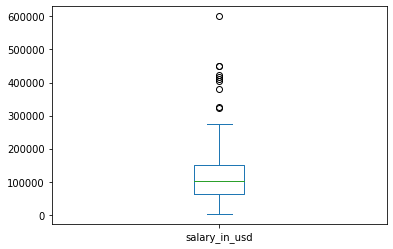

In [18]:
data_job['salary_in_usd'].plot.box()

From above, we find some outliers. We'll exclude them.

In [20]:
data_job_clean = data_job[data_job['salary_in_usd'] <= 300000]

In [21]:
salary_by_year = data_job_clean.groupby('work_year')['salary_in_usd'].mean()

<AxesSubplot:title={'center':'Mean Salary by Year'}, ylabel='work_year'>

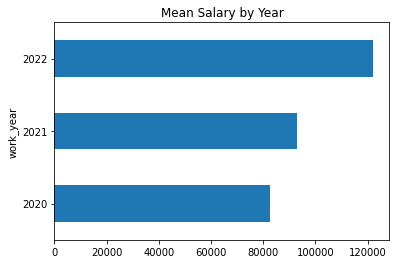

In [22]:
import matplotlib.pyplot as plt
salary_by_year.plot(kind='barh', title='Mean Salary by Year', legend=False)

We can conclude that the mean salary goes up every year.

<AxesSubplot:title={'center':'Mean Remote ratio by Year'}, ylabel='work_year'>

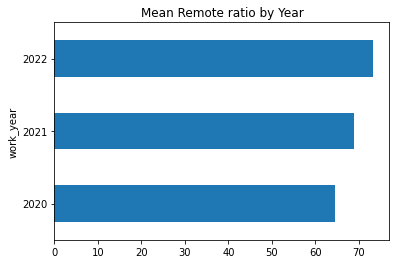

In [23]:
remote_ratio_by_year = data_job_clean.groupby('work_year')['remote_ratio'].mean()
remote_ratio_by_year.plot(kind='barh', title='Mean Remote ratio by Year', legend=False)

The mean remote ratio also goes up every year.

<AxesSubplot:title={'center':'Mean Salary by Level'}, ylabel='experience_level'>

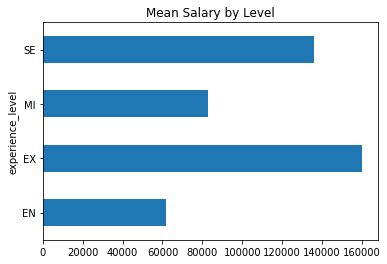

In [24]:
salary_by_level = data_job_clean.groupby('experience_level')['salary_in_usd'].mean()
salary_by_level.plot(kind='barh', title='Mean Salary by Level', legend=False)

<AxesSubplot:title={'center':'Mean Salary by Job_title'}, ylabel='job_title'>

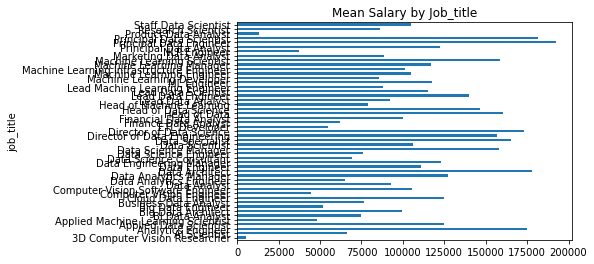

In [25]:
salary_by_job_title = data_job_clean.groupby('job_title')['salary_in_usd'].mean()
salary_by_job_title.plot(kind='barh', title='Mean Salary by Job_title', legend=False)

<AxesSubplot:title={'center':'Mean Salary by Company_size'}, ylabel='company_size'>

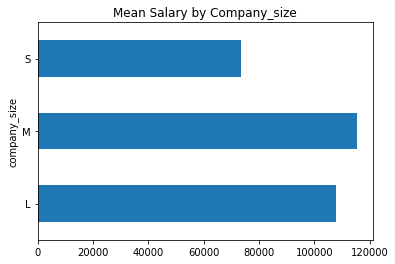

In [26]:
salary_by_company_size = data_job_clean.groupby('company_size')['salary_in_usd'].mean()
salary_by_company_size.plot(kind='barh', title='Mean Salary by Company_size', legend=False)

<AxesSubplot:title={'center':'Mean Salary by Company_location'}, ylabel='company_location'>

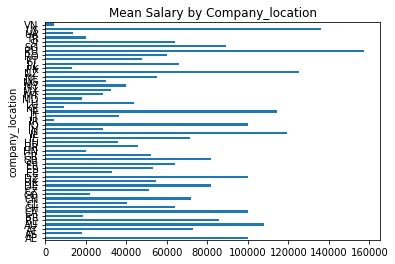

In [29]:
salary_by_company_location = data_job_clean.groupby('company_location')['salary_in_usd'].mean()
salary_by_company_location.plot(kind='barh', title='Mean Salary by Company_location', legend=False)

In [30]:
job_data_corr = data_job_clean[['salary_in_usd', 'experience_level', 'job_title', 'company_size', 'company_location']]

In [32]:
data_job_clean.corr()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.885198,-0.096782,0.243877,0.093091
work_year,0.885198,1.000000,-0.088031,0.266883,0.075312
salary,-0.096782,-0.088031,1.000000,-0.108945,-0.014967
salary_in_usd,0.243877,0.266883,-0.108945,1.000000,0.134026
remote_ratio,0.093091,0.075312,-0.014967,0.134026,1.000000


In [15]:
pip install plotly==5.13.0

Note: you may need to restart the kernel to use updated packages.


F:\python\python.exe: No module named pip


In [13]:
conda install -c plotly plotly=5.13.0

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [10]:
import plotly.express as px
fig_salary = px.box(data_job, y = 'salary_in_usd')
fig_salary.show()

ModuleNotFoundError: No module named 'plotly'